
Visit original tutorial page: https://morvanzhou.github.io/tutorials/

Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:

- torch: 0.4

- matplotlib

In [48]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np


In [122]:
# data simulation
x = torch.linspace(-5, 5, 100)
x = Variable(x)
x_np = x.data.numpy()


- Relu (Reified linear unit):      
    
    $f(x) = ReLu(x) = max(0,x)$
    
    
- Leaky Relu:      

    $f(x) = LeakyReLu(x) = \bigg\{ \begin{matrix}
            x      & for\ x \geq 0 \\
            0.01*x & for\ x < 0    \\
            \end{matrix}
            $
            
            
- ELU (Exponential Relu):  

    $f(a, x) = ELU(a, x) = \bigg\{ \begin{matrix}
            x         & for\ x > 0     \\
            a(e^x -1) & for\ x \leq 0  \\
            \end{matrix}
            $
    
    
- Sigmoid:    
    
    $f(x) = Sigmoid(x) = \frac{1}{1+e^{-x}}$
    
    
- Tanh:
    
    $f(x) = \tanh(x) = \frac{2}{1+e^{-2x}} - 1$, in fact, $ \tanh(x) = 2 Sigmoid(2x) - 1$
    
    
- SoftPlus:
    
    $f(x) = SoftPlus(x) = \ln(1+e^x)$
    

- Swish:

    $f(x) = Swish(x) = x Sigmoid(x) =  \frac{x}{1+e^{-x}}$


- Mish:

    $f(x) = Mish(x) = x \tanh(SoftPlus(x)) =  x \tanh(\ln(1+e^x))$


Ok, now this has characteristics similar to sigmoid that we discussed above. It is nonlinear in nature, so great we can stack layers! It is bound to range (-1, 1) so no worries of activations blowing up. One point to mention is that the gradient is stronger for tanh than sigmoid ( derivatives are steeper). Deciding between the sigmoid or tanh will depend on your requirement of gradient strength. Like sigmoid, tanh also has the vanishing gradient problem.




In [123]:
# following are poular activtion functions
# y_relu = torch.relu(x).data.numpy()
# y_sigmoid = torch.sigmoid(x).numpy()
# y_tanh = torch.tanh(x).data.numpy()
# y_softplus = F.softplus(x).data.numpy() # there's no softplus in torch 0.4
# y_swish = (x*torch.sigmoid(x).data.numpy()
           
           
y_relu = torch.relu(x)
y_sigmoid = torch.sigmoid(x)
y_tanh = torch.tanh(x)
y_softplus = torch.log(1+ torch.exp(x)) # F.softplus(x) # there's no softplus in torch 0.4
y_swish = x*torch.sigmoid(x)
y_mish = x*torch.tanh(y_softplus) # x*torch.log(1+ torch.exp(x))
           
           
# y_softplus = torch.softplus(x).data.numpy() #  
# this is a special kind of activation function, it is about probability

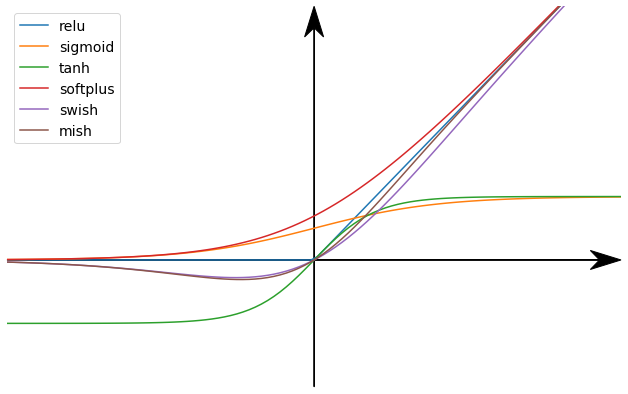

In [126]:
import arrowed_spines

y = torch.stack((y_relu, y_sigmoid, y_tanh, y_softplus, y_swish, y_mish))

fig = plt.figure(1, figsize=(11,7))
ax = fig.add_subplot() # add_subplot(121)
h = ax.plot(x_np, np.transpose(y.data.numpy()))
plt.xlim((-5,5))
plt.ylim((-2,4))
plt.xticks(np.linspace(-5,5,11)) # labels 
plt.yticks(np.linspace(-2,4,7))
ax.xaxis.set_ticks_position('bottom') # tick markers

ax..spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

arrowed_spines.arrowed_spines(fig,ax)

plt.legend(h, ['relu', 'sigmoid', 'tanh', 'softplus', 'swish', 'mish'], loc='best', fontsize=14)


plt.show()


In [57]:
print(y, y.shape)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.1724,
          0.5172,  0.8621,  1.2069,  1.5517,  1.8966,  2.2414,  2.5862,  2.9310,
          3.2759,  3.6207,  3.9655,  4.3103,  4.6552,  5.0000],
        [ 0.0067,  0.0094,  0.0133,  0.0186,  0.0261,  0.0364,  0.0506,  0.0700,
          0.0961,  0.1305,  0.1748,  0.2303,  0.2969,  0.3735,  0.4570,  0.5430,
          0.6265,  0.7031,  0.7697,  0.8252,  0.8695,  0.9039,  0.9300,  0.9494,
          0.9636,  0.9739,  0.9814,  0.9867,  0.9906,  0.9933],
        [-0.9999, -0.9998, -0.9996, -0.9993, -0.9986, -0.9971, -0.9943, -0.9887,
         -0.9776, -0.9559, -0.9141, -0.8357, -0.6973, -0.4756, -0.1707,  0.1707,
          0.4756,  0.6973,  0.8357,  0.9141,  0.9559,  0.9776,  0.9887,  0.9943,
          0.9971,  0.9986,  0.9993,  0.9996,  0.9998,  0.9999],
        [ 0.0067,  0.0095,  0.0133,  0.0188,  0.0264,  0.0371,  0.0520,  0.0726